# Лабораторная работа №6. Построение пайплайна одномерной регрессии.

__Цель лабораторной работы__: разработка единого пайплайна для решения задачи регрессии.

## Методика выполнения работы

1. Подберите набор данных на ресурсах [5-7] и согласуйте свой выбор с
преподавателем. Студент может предложить синтезированный набор данных.

2. Постройте модель регрессии на основе универсального пайплайна.

In [37]:
# Подключаем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Загрузка данных
dataset = pd.read_csv('data.csv')
dataset.head()

,first,second
0,1.20,0.784115
1,1.40,1.067267
2,1.80,1.764258
3,1.56,1.325154
4,1.32,0.948779


In [39]:
# Разделение данных на матрицу признаков и зависимую переменную
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print('Матрица признаков: ', x, sep='\n')
print('Зависимая переменная: ', y, sep='\n')

Матрица признаков: 
[[ 1.2 ]
 [ 1.4 ]
 [ 1.8 ]
 [ 1.56]
 [ 1.32]
 [ 1.78]
 [ 2.54]
 [ 8.45]
 [ 5.56]
 [ 7.34]
 [ 9.34]
 [ 2.2 ]
 [ 2.4 ]
 [ 2.8 ]
 [ 2.56]
 [ 2.32]
 [ 2.78]
 [ 3.54]
 [ 9.45]
 [ 6.56]
 [ 8.34]
 [10.34]
 [ 3.2 ]
 [ 3.4 ]
 [ 3.8 ]
 [ 3.56]
 [ 3.32]
 [ 3.78]
 [ 4.54]
 [10.45]
 [ 7.56]]
Зависимая переменная: 
[ 0.78411471  1.06726724  1.76425809  1.32515385  0.94877879  1.72527016
  3.51305169 38.88038215 16.83320026 29.33656268 47.50188671  2.63549665
  3.13645882  4.26906896  3.56859315  2.93084652  4.20830007  6.82375823
 48.62736357 23.43283237 37.87470059 58.21812102  5.5759268   6.29469861
  7.86292803  6.90108065  6.00196246  7.78037817 11.22351297 59.46339319
 31.12151269]


In [40]:
# Разделение выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

In [41]:
# Обучение линейной модели регрессии
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [42]:
# Предсказание, обработка и визуализация результатов
y_pred = regressor.predict(x_test)
print(y_pred)

[-0.45230013 50.33290704  5.41882209 43.81596138 11.17252186  9.88087497
  7.76727097  1.89614876]


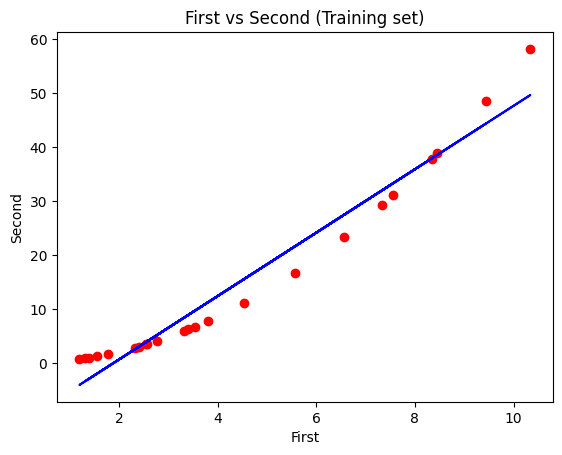

In [43]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('First vs Second (Training set)')
plt.xlabel('First')
plt.ylabel('Second')
plt.show()

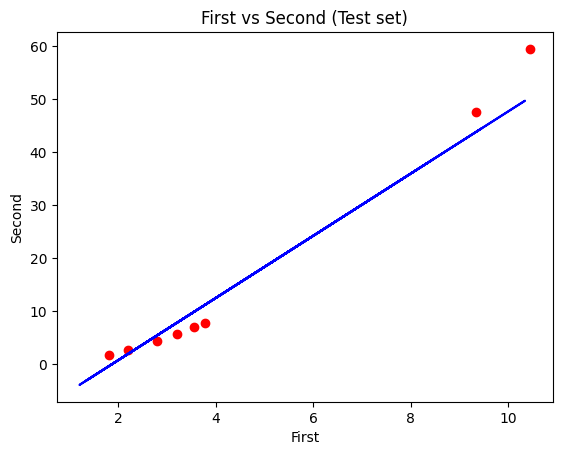

In [44]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('First vs Second (Test set)')
plt.xlabel('First')
plt.ylabel('Second')
plt.show()

## Контрольные вопросы

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?

    Масштабирование признаков не является обязательным для линейной регрессии, так как модель обучается на коэффициентах, а не на абсолютных значениях признаков. Коэффициенты линейной регрессии показывают, насколько изменение одной единицы одного признака влияет на зависимую переменную, независимо от масштаба этого признака.

    Однако, в некоторых случаях масштабирование может быть полезным:
    - Улучшение сходимости: Оптимизационные алгоритмы могут работать более эффективно, если признаки имеют одинаковый масштаб.
    - Интерпретация коэффициентов: Если признаки имеют разные единицы измерения, интерпретация коэффициентов может быть сложнее Масштабирование позволяет привести все признаки к одинаковому масштабу, что упрощает интерпретацию.
    
2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?
    
    Квадратичное отклонение используется по нескольким причинам:
    - Чувствительность к выбросам: Квадратичная функция более чувствительна к выбросам, чем функция модуля отклонения. Это позволяет модели лучше учитывать точки, которые значительно отклоняются от основной массы данных.
    - Выпуклость: Квадратичная функция является выпуклой функцией, что означает, что она имеет единственный минимум. Это упрощает оптимизацию модели.
    - Математическая простота: Квадратичная функция проще в вычислении, чем функция модуля отклонения.

3. Что именно реализовано в методе fit(X, y) класса LinearRegression?

    Метод fit(X, y) класса LinearRegression используется для обучения модели линейной регрессии на данных. Он принимает два аргумента:
    - X: Матрица, где каждая строка представляет собой точку данных, а каждый столбец - признак.
    - y: Вектор, содержащий значения зависимой переменной для всех точек данных.
    
    Метод fit выполняет следующие действия:
    - Вычисляет коэффициенты модели: Используя метод наименьших квадратов, метод fit находит значения коэффициентов a и b в уравнении линейной регрессии: y = ax + b.
    - Сохраняет коэффициенты: Найденные значения коэффициентов a и b сохраняются в объекте модели.
    - Возвращает объект модели: Метод fit возвращает объект модели, который можно использовать для прогнозирования значений зависимой переменной для новых точек данных.

4. Что такое p-значение? Как p-значение используется при оптимизации моделей регрессии?
    
    P-значение - это мера статистической значимости.

    В контексте линейной регрессии p-значение используется для оценки статистической значимости коэффициентов модели.

    Малое p-значение (обычно меньше 0,05) означает, что коэффициент вероятно не равен нулю.

    Другими словами, существует низкая вероятность, что наблюдаемое значение коэффициента является случайным.

    P-значения не используются напрямую при оптимизации моделей регрессии.

    Однако, их можно использовать после обучения модели для интерпретации полученных результатов.

5. Поясните назначение метода predict класса LinearRegression.
    
    Метод predict класса LinearRegression используется для прогнозирования значений зависимой переменной для новых точек данных.

    Он принимает один аргумент:
    - X: Матрица, где каждая строка представляет собой новую точку данных, для которой требуется сделать прогноз.

    Метод predict возвращает вектор, где каждый элемент представляет собой прогнозируемое значение зависимой переменной для соответствующей строки в матрице X.

6. Поясните назначение метода plot и scatter класса pyplot.

    Методы plot и scatter класса pyplot используются для визуализации данных.

    plot:  Метод plot используется для построения линии на графике. Он принимает два обязательных аргумента:
    - x: Массив значений по оси X.
    - y: Массив значений по оси Y.

    scatter:  Метод scatter используется для построения точечного графика. Он принимает два обязательных аргумента:
    - x: Массив значений по оси X.
    - y: Массив значений по оси Y.

    Оба метода могут принимать дополнительные аргументы для настройки внешнего вида графика, такие как цвет линии, маркеры точек и т.д.

7. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?
   
    Точность модели машинного обучения следует оценивать на тестовой подвыборке.

    Тренировочная подвыборка используется для обучения модели. Оценка точности на тренировочной подвыборке может привести к переоценке модели, так как она хорошо подгоняется под данные, на которых она обучалась.

    Тестовая подвыборка - это независимый набор данных, который модель не видела во время обучения. Оценка точности на тестовой подвыборке дает более реалистичное представление о том, насколько хорошо модель будет работать на новых данных.